#### **Biniam Abebe - 04/20/2024**

# <center><font color=black>Hands-on Assignment</font> </center>  
## <font color=black>Complete the following two sections on Supervised Machine Learning: </font> 
 - Linear Regression
 
 - Logistic Regression

# <center><font color=green>Linear and Logistic Regression</font> </center> 
# <center><font color=green>Part 1: Linear Regression</font> </center> 

## Machine Learning Supervised Linear Regression

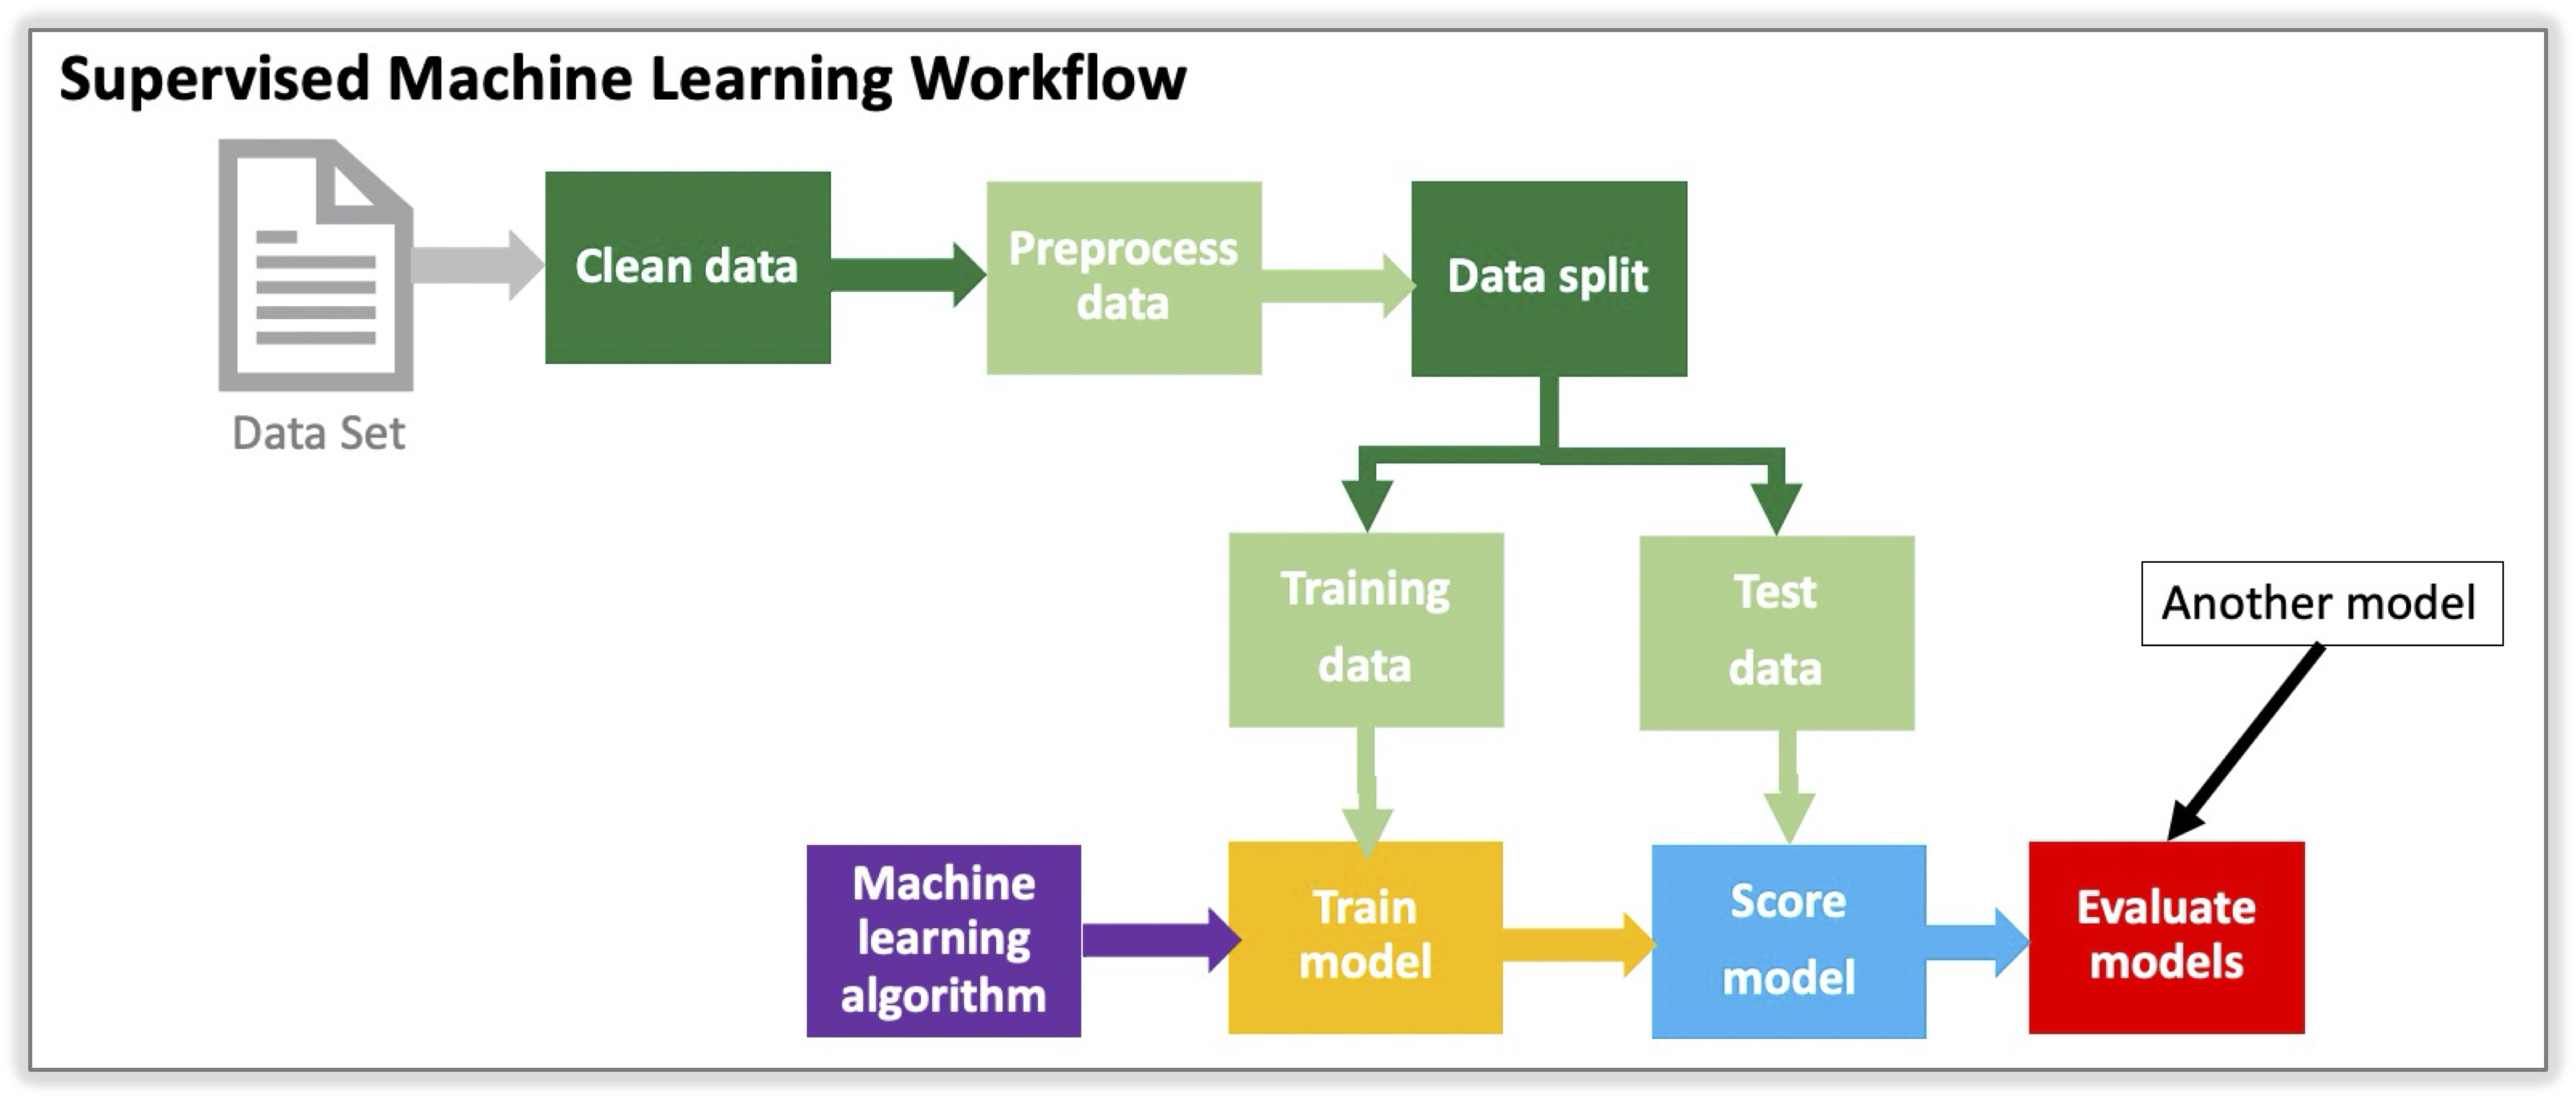

* You can see in the workflow; supervised learning starts with the data set. Remember, since it is supervised, the data is labeled. Then there is some data preprocessing (cleaning) to be done. Next, you will declare your input (X/Independent variables) and output (Target Variable/Dependent or Y) NumPy Arrays. Then the data is split into a testing and training set. Then you will build and train the model, use the model for predictions, and evaluate/validate the model. So let's begin.!

## STEP 1: Import Libraries 
- import pandas and numpy libraries
- import scatter_matrix from pandas.plotting
- import LinearRegression from sklearn.linear_model
- import train_test_split, KFold, and cross_val_score from sklearn.model_selection 
- import matplotlib
- import seaborn


In [33]:
#Add your code here
#Import Libraries 
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

#additonal need Library
import numpy as np
import os
# filter warnings
import warnings
warnings.filterwarnings("ignore")


## <font color=grey> WORKFLOW: DATA SET </font>

## STEP 2: Read data description and Load the Data
- Read the description of the dataset listed below
- Dataset is provided in the module and assignment. It is called housing_boston.csv.
- Load the data into Pandas dataframe called df
- View the first five rows of the dataframe

### Description of Boston Housing Dataset 
* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq. ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the concentration of the nitric oxide (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* AA: This is calculated as 1000(AA — 0.63)², where AA is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in $1000s

In [97]:
#Add your code here
# Specify the location of the dataset.
housingfile = 'housing_boston.csv'


In [98]:
#Add your code here
# Load the data into a Pandas DataFrame
df= pd.read_csv (housingfile, header=None)

In [99]:
# Display the first 5 rows of the dataset
df.head()

0     1     2   3      4      5     6       7   8    9     10      11  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296  15.3  396.90   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242  17.8  396.90   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242  17.8  392.83   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222  18.7  394.63   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222  18.7  396.90   

     12    13  
0  4.98  24.0  
1  9.14  21.6  
2  4.03  34.7  
3  2.94  33.4  
4  5.33  36.2

## STEP 3: Give names to the columns since there are no headers 
- Give the following names to the columns:
'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'AA', 'LSTAT', 'MEDV'
- Verify columns names were added
- View the first five rows of the dataframe

In [100]:
#Add your code here
#give names to the columns columns:'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'AA', 'LSTAT', 'MEDV'
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'AA', 'LSTAT', 'MEDV']

In [101]:
#Add your code here
# Let's check to see if the column names were added
df.columns = col_names


In [102]:
# Look at the first 5 rows of data
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

       AA  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

## <font color=grey> WORKFLOW: Clean and Preprocess the Dataset </font>

## STEP 4: Clean the data
- Find and Mark Missing Values 
- If there are no missing data points, then proceed to Step 5.

In [104]:
#Add your code here
df.isnull().sum()
# We see there are no missing data points

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
AA         0
LSTAT      0
MEDV       0
dtype: int64

## STEP 5: Performing the Exploratory Data Analysis (EDA) 
- Print a count of the number of rows (observations) and columns (variables)
- Print the data types of all variables
- Print a summary statistics of the data

In [105]:
# Get the number of records/rows and the number of variables/column
#Add your code here
print(df.shape)

(452, 14)


In [106]:
# Get the data types of all variables
#Add your code here
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
AA         float64
LSTAT      float64
MEDV       float64
dtype: object


In [107]:
# Obtain the summary statistics of the data
#Add your code here
print(df.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean     1.420825   12.721239   10.304889    0.077434    0.540816    6.343538   
std      2.495894   24.326032    6.797103    0.267574    0.113816    0.666808   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.069875    0.000000    4.930000    0.000000    0.447000    5.926750   
50%      0.191030    0.000000    8.140000    0.000000    0.519000    6.229000   
75%      1.211460   20.000000   18.100000    0.000000    0.605000    6.635000   
max      9.966540  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO          AA  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean    65.557965    4.043570    7.823009  377.442478   18.247124  369.826504   
std     28.127025    2.0904

## STEP 5A: Create Histograms 
- Create histograms for each variable from the dataframe df with a figure size of 14 x 12
- Plot the histograms

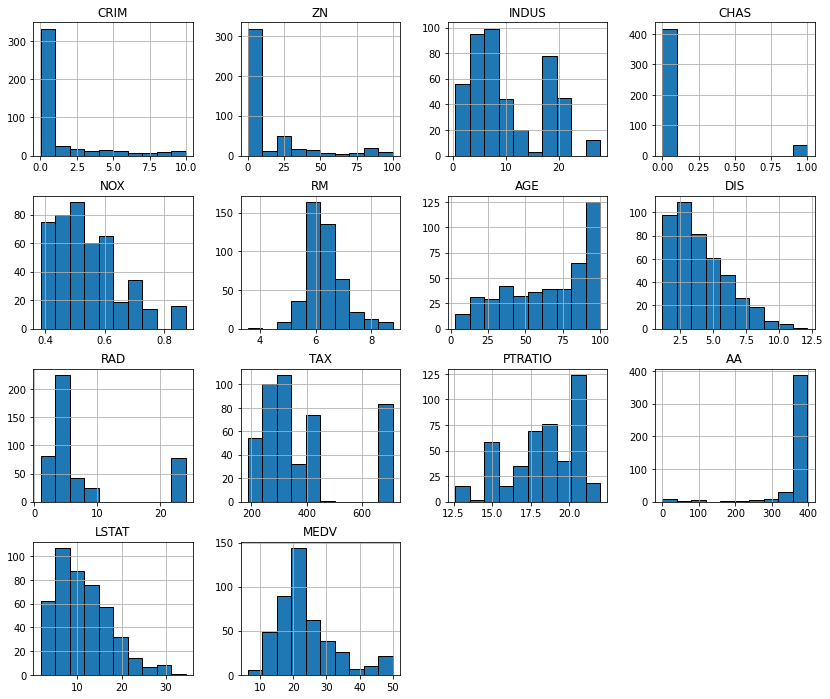

In [108]:
# Plot histogram for each variable. I encourage you to work with the histogram. 
# Create histograms for each variable from the dataframe df with a figure size of 14 x 12
# Plot the histograms
#Add your code here
df.hist(edgecolor= 'black',figsize=(14,12)) 
plt.show()

## STEP 5B: Create Density Plots 
- Create density plots from the dataframe df that 14 numeric variables, at least 14 plots, layout (5,3): 5 rows, each row with 3 plots 
- Plot the density plots

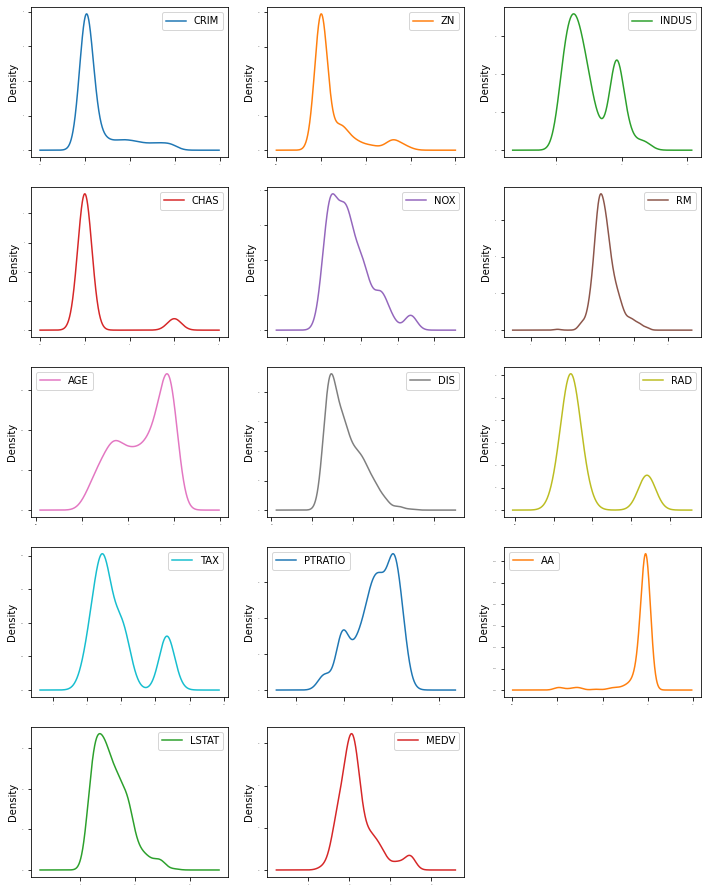

In [109]:
# Density plots
# Notes: 14 numeric variables, at least 14 plots, layout (5,3): 5 rows, each row with 3 plots
#Add your code here
df.plot(kind='density', subplots=True, layout= (5,3), sharex=False, legend=True, fontsize=1, figsize= (12,16))
plt.show()


## STEP 5C: Create Boxplots 
- Create a boxplots from the dataframe df with a layout (5,3) and figure size (20,18). Ensure subplots is True and sharex is False.
- Plot the boxplots

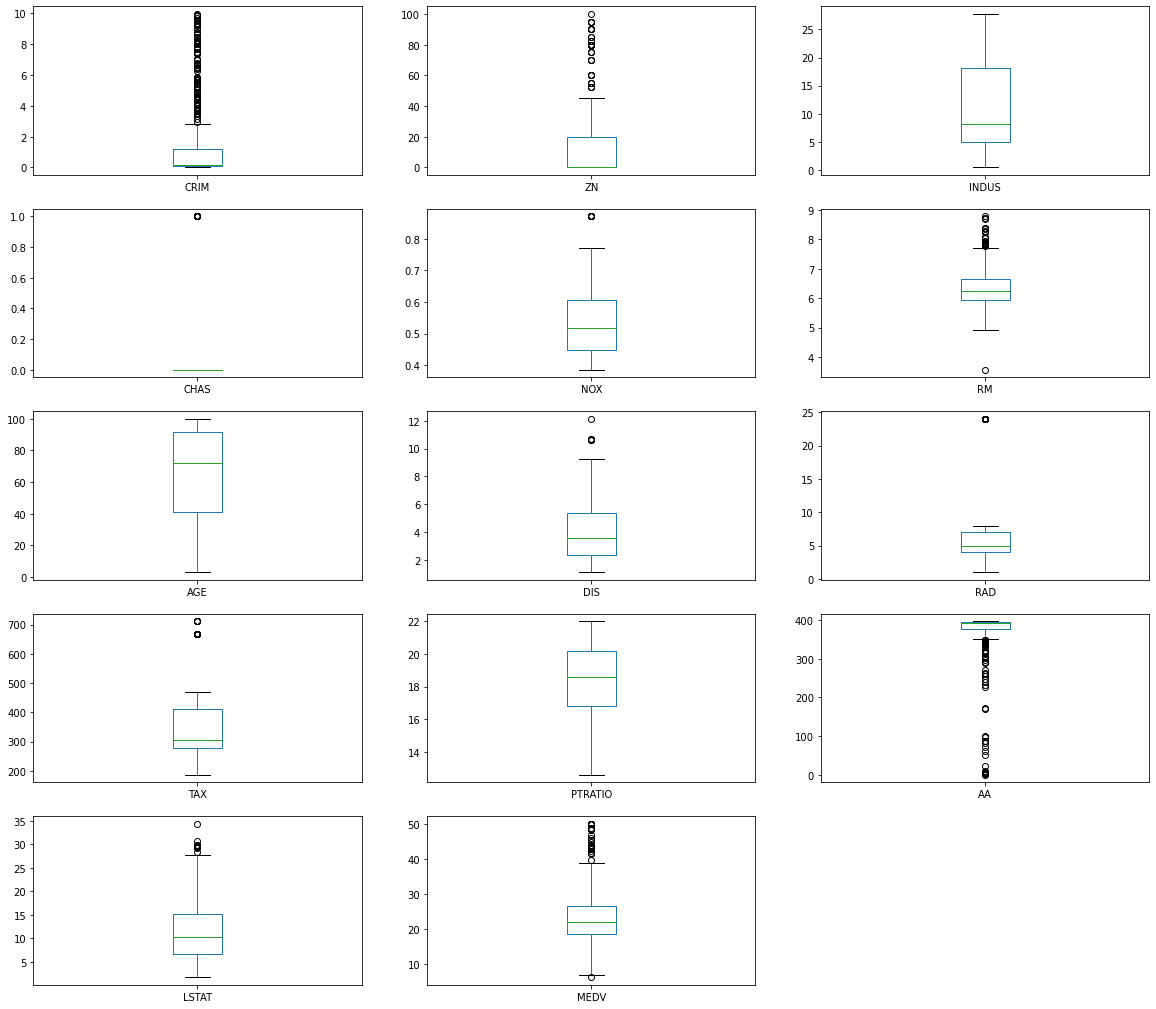

In [110]:
# Create a boxplots from the dataframe df with a layout (5,3) and figure size (20,18). Ensure subplots is True and sharex is False.
# Plot the boxplots
#Add your code here
df.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(20,18))
plt.show()


## STEP 5D: Pair Plots - Correlation Analysis and Feature Selection 
- Create pair plots of the dataframe with a height of 1.5
- Plot the pair plots
- Use the format function to decrease the number of decimal places to three
- Obtain the correlation of the dataframe

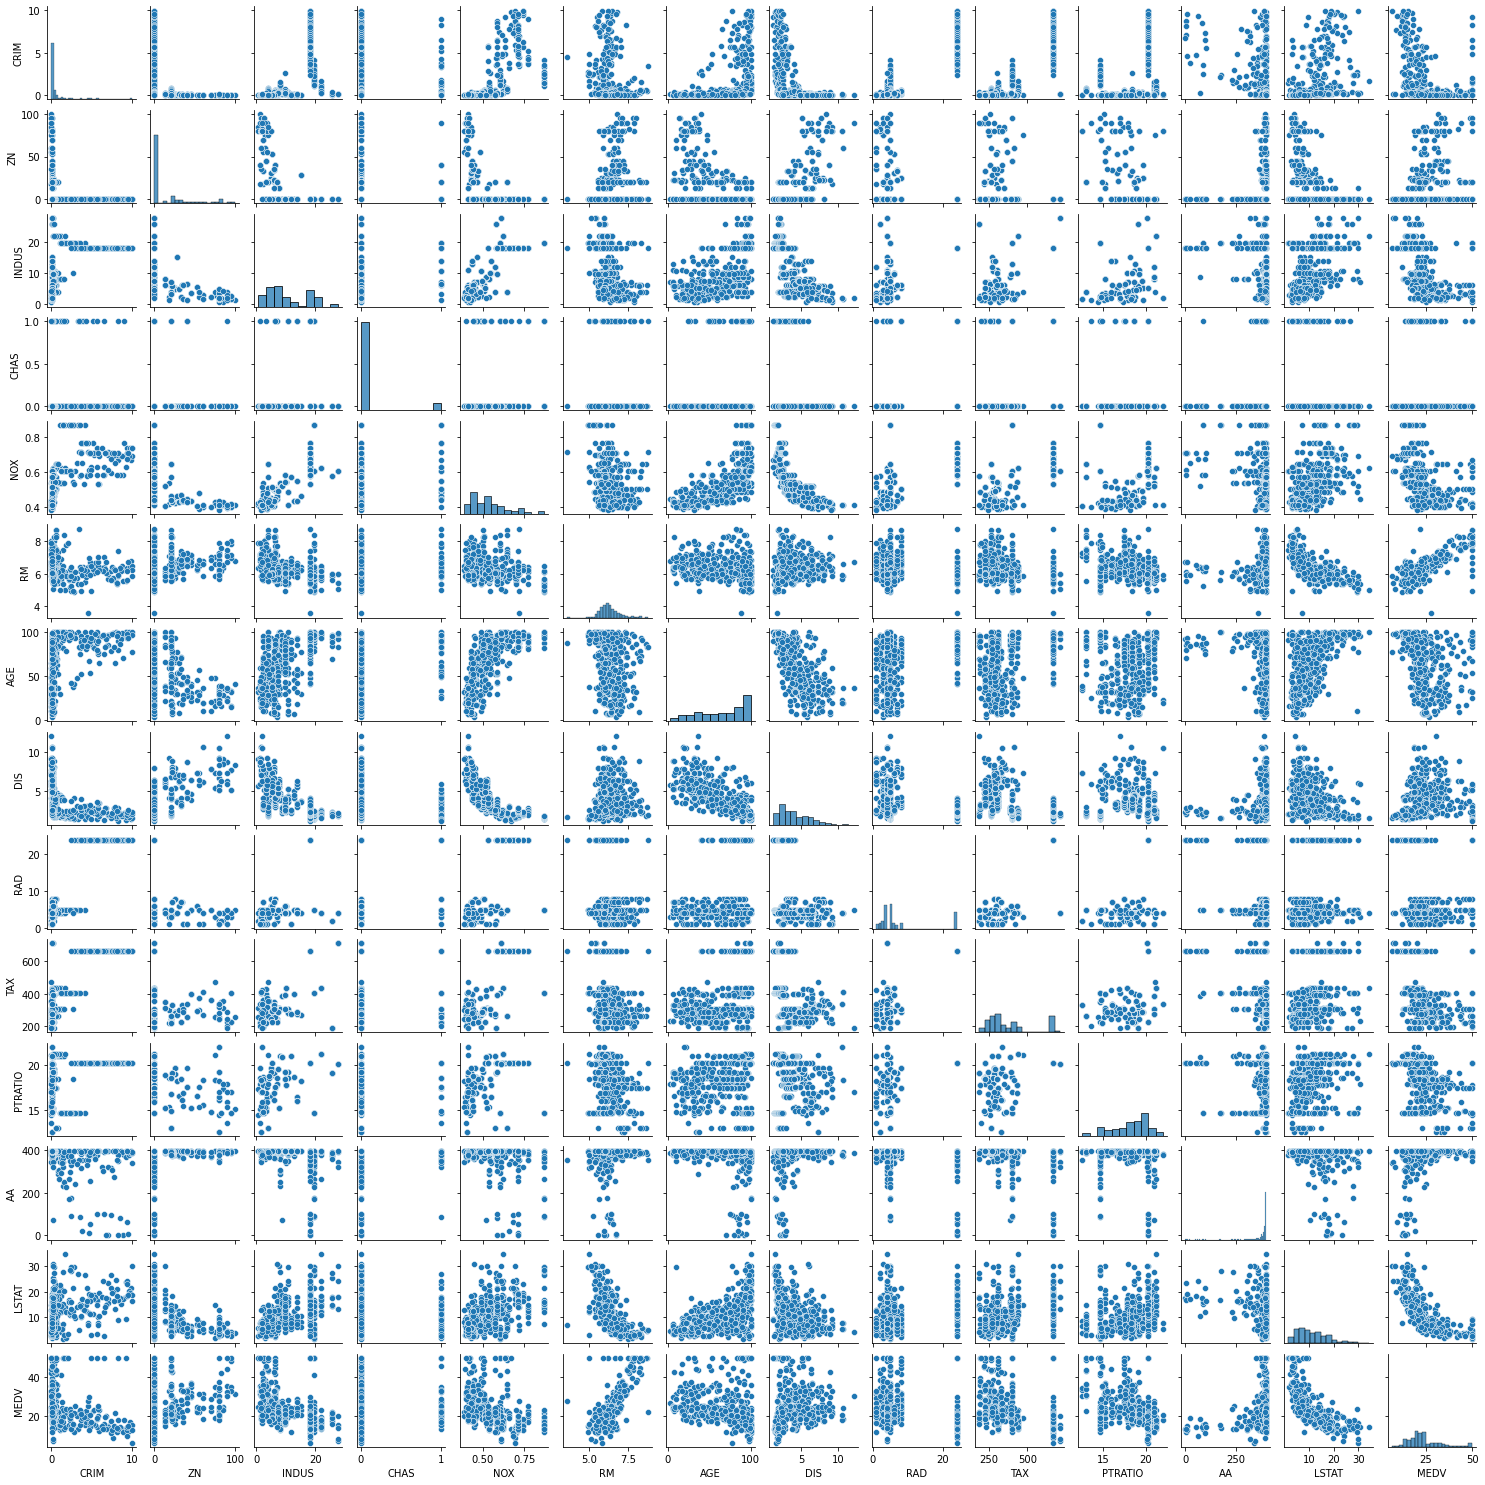

In [112]:
#Obtain pair plots of the data. I know this is a lot of information, but I wanted you to see what is possible with the Seaborn library.
#Add your code here
sns.pairplot(df, height=1.5); 
plt.show()

In [113]:
# We will decrease the number of decimal places with the format function.
#Add your code here
pd.options.display.float_format = '{:,.3f}'.format


In [114]:
# Here we will get the correlations, with only 3 decimals.
#Add your code here
df.corr()



CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
CRIM     1.000 -0.281  0.574  0.050  0.637 -0.142  0.448 -0.462  0.898  0.826   
ZN      -0.281  1.000 -0.514 -0.060 -0.501  0.307 -0.556  0.656 -0.267 -0.269   
INDUS    0.574 -0.514  1.000  0.103  0.739 -0.365  0.606 -0.669  0.513  0.673   
CHAS     0.050 -0.060  0.103  1.000  0.134  0.077  0.123 -0.141  0.057  0.017   
NOX      0.637 -0.501  0.739  0.134  1.000 -0.265  0.707 -0.746  0.542  0.615   
RM      -0.142  0.307 -0.365  0.077 -0.265  1.000 -0.188  0.139 -0.096 -0.215   
AGE      0.448 -0.556  0.606  0.123  0.707 -0.188  1.000 -0.720  0.359  0.427   
DIS     -0.462  0.656 -0.669 -0.141 -0.746  0.139 -0.720  1.000 -0.388 -0.444   
RAD      0.898 -0.267  0.513  0.057  0.542 -0.096  0.359 -0.388  1.000  0.873   
TAX      0.826 -0.269  0.673  0.017  0.615 -0.215  0.427 -0.444  0.873  1.000   
PTRATIO  0.319 -0.364  0.317 -0.100  0.103 -0.334  0.193 -0.152  0.387  0.385   
AA      -0.413  0.150 -0.317  0.013 -0.358  0.108 -0.224  0.234 -0.353 -0.367   
LSTAT    0.425 -0.411  0.565 -0.009  0.537 -0.607  0.573 -0.424  0.310  0.411   
MEDV    -0.286  0.332 -0.412  0.154 -0.333  0.740 -0.300  0.139 -0.218 -0.346   

         PTRATIO     AA  LSTAT   MEDV  
CRIM       0.319 -0.413  0.425 -0.286  
ZN        -0.364  0.150 -0.411  0.332  
INDUS      0.317 -0.317  0.565 -0.412  
CHAS      -0.100  0.013 -0.009  0.154  
NOX        0.103 -0.358  0.537 -0.333  
RM        -0.334  0.108 -0.607  0.740  
AGE        0.193 -0.224  0.573 -0.300  
DIS       -0.152  0.234 -0.424  0.139  
RAD        0.387 -0.353  0.310 -0.218  
TAX        0.385 -0.367  0.411 -0.346  
PTRATIO    1.000 -0.090  0.303 -0.461  
AA        -0.090  1.000 -0.291  0.265  
LSTAT      0.303 -0.291  1.000 -0.706  
MEDV      -0.461  0.265 -0.706  1.000

## STEP 5E: Creating Heatmaps 
- Create a heatmap of the dataframe with a figure size of 16x10, use the dataframe correlation and ensure annot is True
- Plot the heatmap
- For help type sns.heatmap?
- Create another dataframe df2 with less variables 
- Obtain the correlation of the dataframe df2
- Plot pair plot for df2 with a height of 5.5
- Create a heatmap of the dataframe df2 with a figure size of 20x12, use the dataframe correlation and ensure annot is True
- Change the color to blue and increase the font size 20

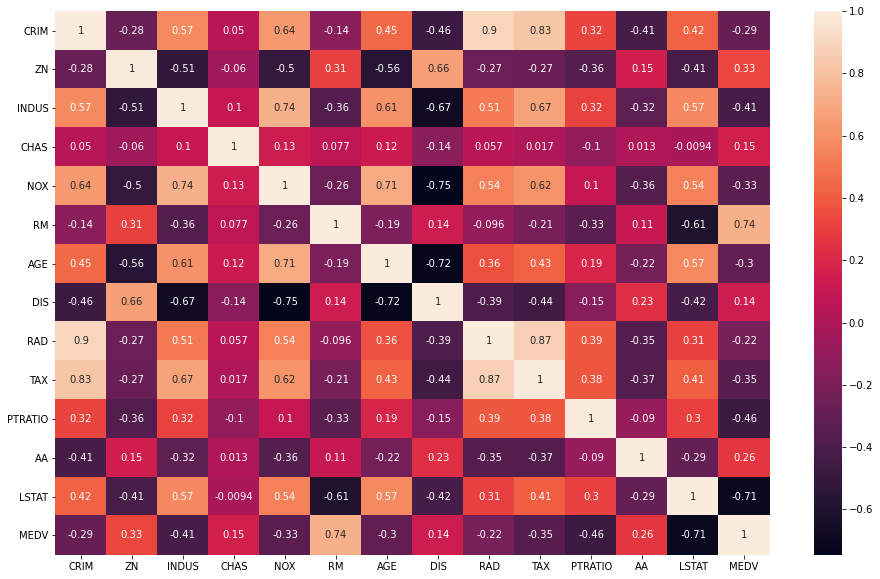

In [115]:
# We could simply look at the correlations, but a heatmap is a great way to present to the general audience.
#Add your code here
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()




In [117]:
# If you get stuck on what can be done with the heatmap, you can use the following code to get help
#Add your code here
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

In [118]:
# Now, let's say we want to decrease the number of variables in our heatmap.
# Remember how to make a subset. Try using different variables.
#Add your code here
df2= df[['CRIM','INDUS', 'TAX','MEDV']]



In [119]:
# Here we will look at the correlations for only the variables in df2.
#Add your code here
df2.corr()


CRIM  INDUS    TAX   MEDV
CRIM   1.000  0.574  0.826 -0.286
INDUS  0.574  1.000  0.673 -0.412
TAX    0.826  0.673  1.000 -0.346
MEDV  -0.286 -0.412 -0.346  1.000

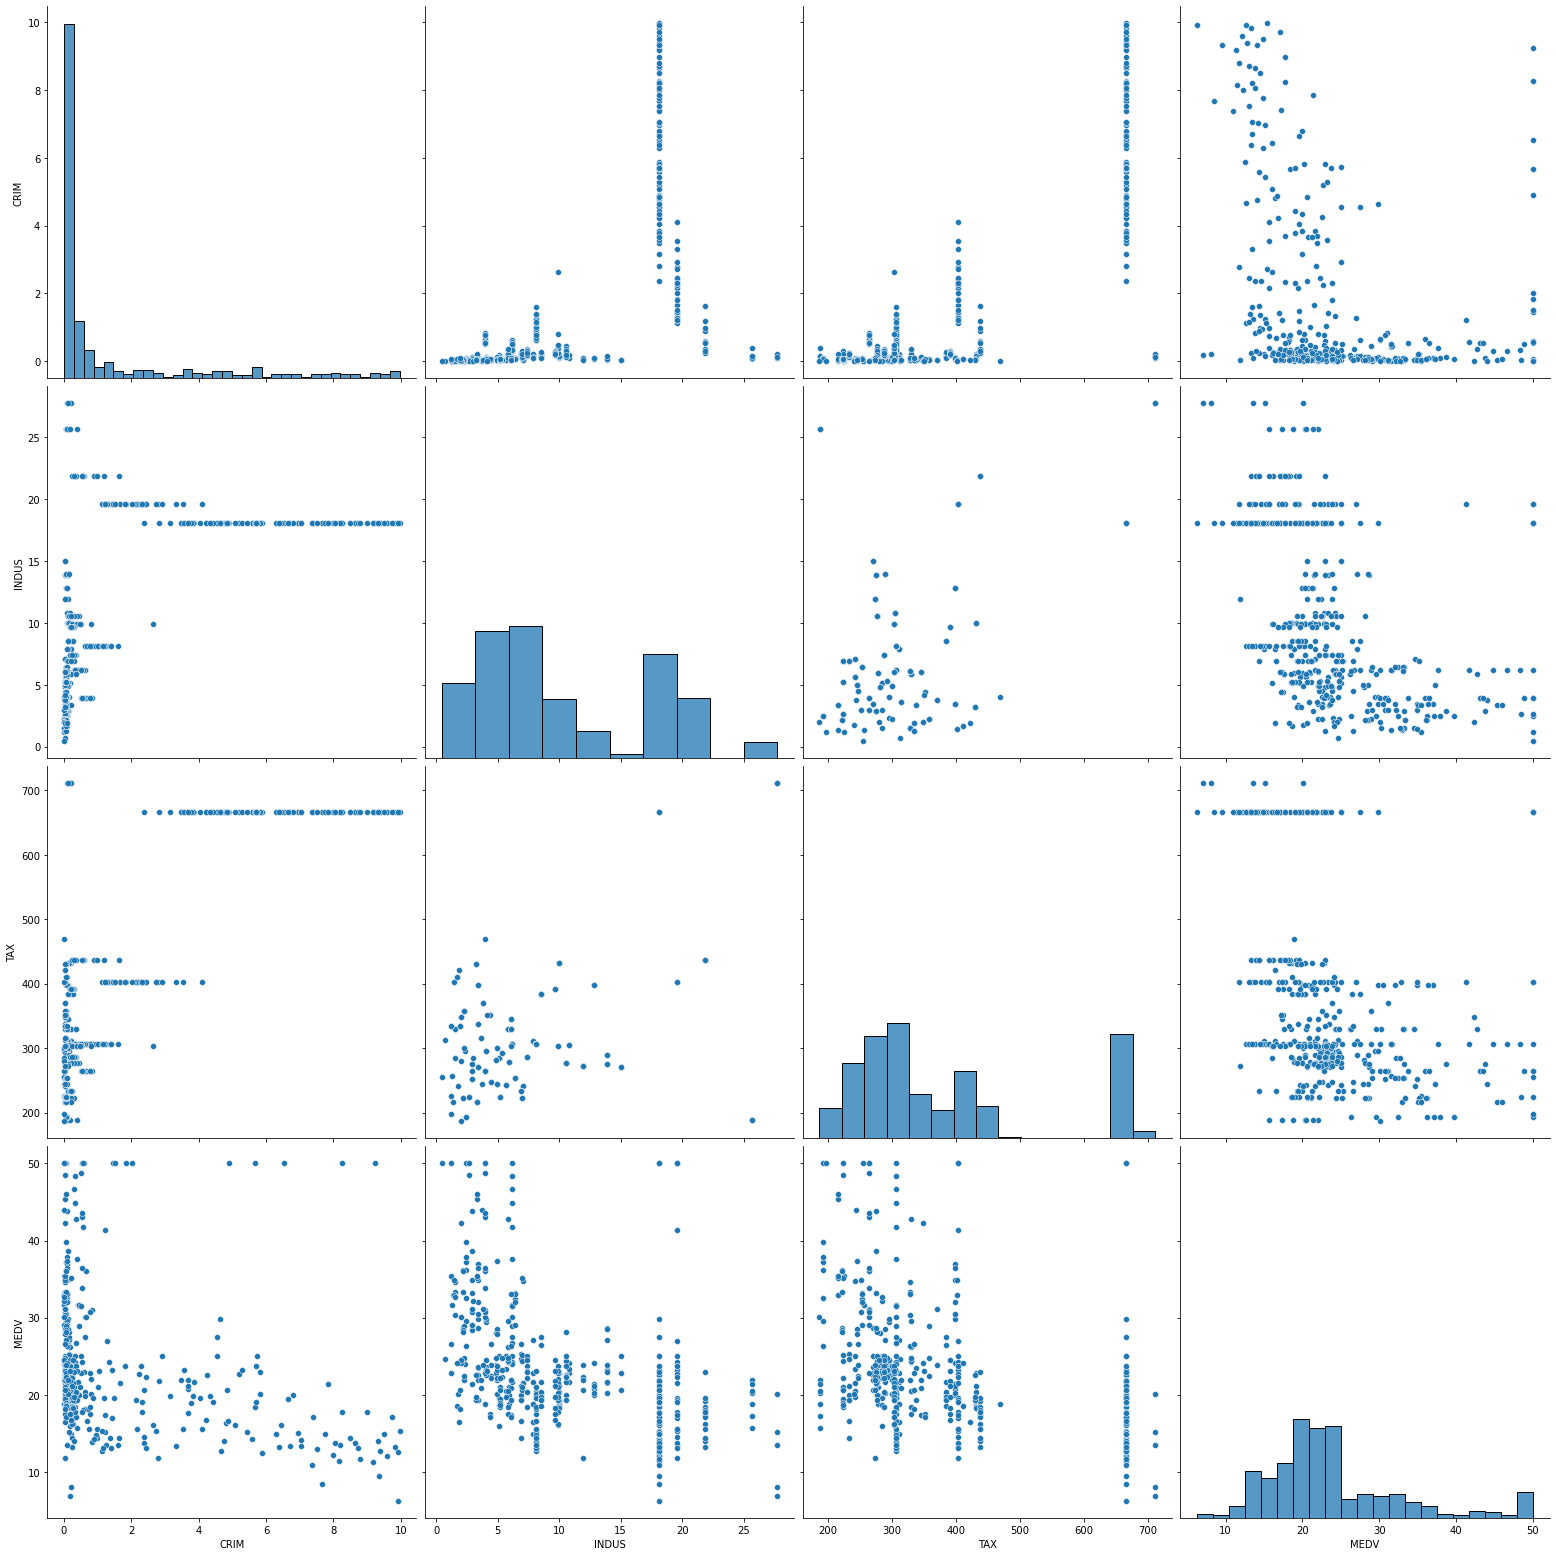

In [120]:
# Let's try the pairplot with only the variables in df2
# Plot pair plot for df2 with a height of 5.5
#Add your code here
sns.pairplot(df2, height=5.5)
plt.show()




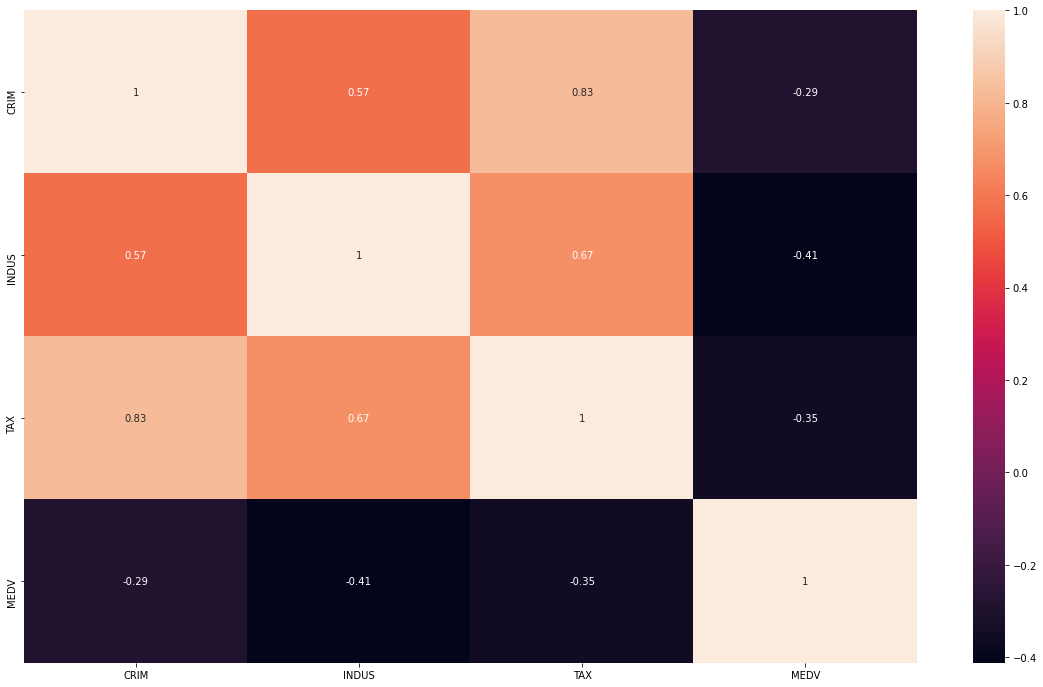

In [123]:
# Now, we will make a heatmap with only the variables in the df2 subset.
# Create a heatmap of the dataframe df2 with a figure size of 20x12, use the dataframe correlation and ensure annot is True
# Change the color to blue and increase the font size 20
#Add your code here
plt.figure(figsize =(20,12)) 
sns.heatmap(df2.corr(), annot=True) 
plt.show()

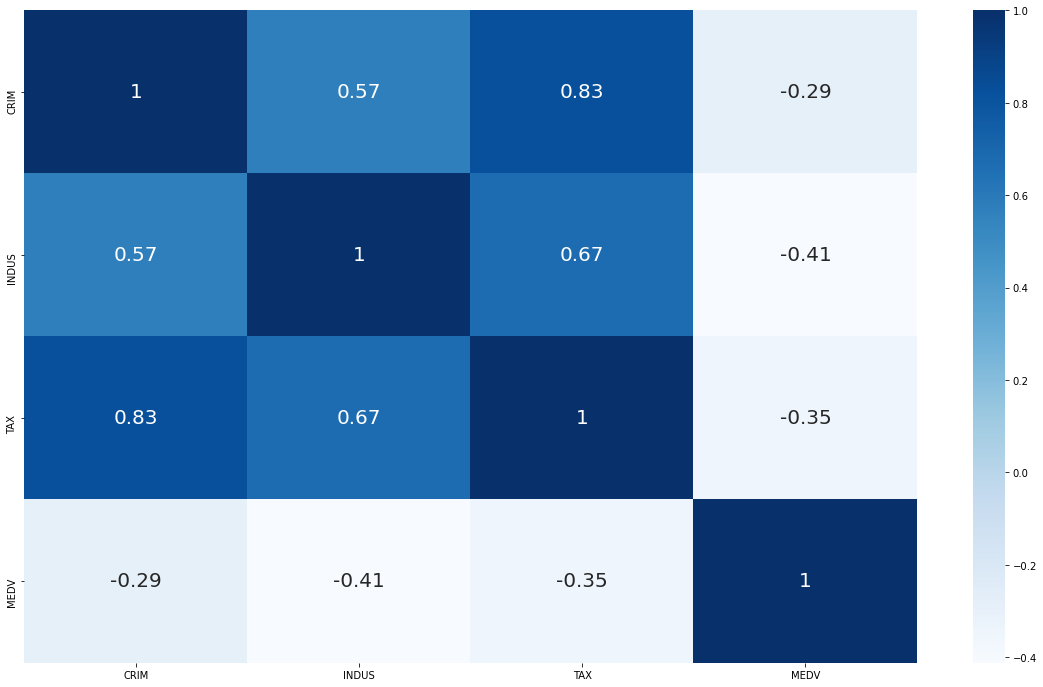

In [125]:
#If you want to change the color and font to make the labels easier to read, use this code.
#Add your code here
plt.figure(figsize =(20,12))
sns.heatmap(df2.corr(), cmap="Blues", annot=True, annot_kws={"fontsize":20}) 
plt.show()



## <font color=grey> WORKFLOW: DATA SPLIT </font>

## STEP 6: Separate the Dataset into Input & Output NumPy Arrays 
- Store the dataframe d2 values into a NumPy array
- Separate the array into input and output components by slicing 

In [126]:
# Store the dataframe values into a NumPy array
array= df2.values
# Separate the array into input and output components by slicing
# For X (input) [:, 0:13] --> all the rows, columns from 0 - 12 (13 - 1)
X = array[:,0:3]
# For Y (output) [:3] --> All the rows in the last column (MEDV)
Y = array [:,3]

## STEP 7: Split into Input/Output Array into Training/Testing Datasets 
- Split the dataset into training at 67% and test at 33% with the seed = 7


In [128]:
# Split the dataset --> training sub-dataset: 67%, and test sub-dataset:33%
test_size = 0.33
# Selection of records to include in which sub-dataset must be done randomly - use the for seed randomization
seed = 7
# Split the dataset (both input & output) into training/testing datasets
#Add your code here
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


## <font color=grey> WORKFLOW: TRAIN MODEL </font>

## STEP 8: Build and Train the Model 
- Assign LinearRegression to the model
- Train the model 
- Print the intercept and coefficients
- Print the list of the coefficients with their correspondent variable name


In [137]:
#Add your codes here
# Build the model
model = LinearRegression()
# Train the model using the training sub-dataset
model.fit(X_train, Y_train)
# Print intercept and coefficients
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)


Intercept: 31.561375131572596
Coefficients: [-0.05240879 -0.45185299 -0.00915631]


In [138]:
# Print out the list of the coefficients with their correspondent variable name
# Pair the feature names with the coefficients
names_ = df2.columns[0:3]
coefficients = model.coef_
names_coeff = list(zip(names_, coefficients))

# Convert iterator into a set
names_coeff_set = set(names_coeff)

#print
for coef in names_coeff_set:
    print (coef, "\n")



('TAX', -0.009156313349060512) 

('INDUS', -0.45185299387878497) 

('CRIM', -0.05240879307447724) 



In [141]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1)

## <font color=grey> WORKFLOW: SCORE MODEL </font>

## STEP 9: Calculate R-Squared 
- Calculate the R-Squared 
- Print the score

** Note: The higher the R-squared, the better (0 – 100%). Depending on the model, the best models score above 83%. The R-squared value tells us how well the independent variables predict the dependent variable, which is very low. Think about how you could increase the R-squared. What variables would you use? 

In [139]:
#Add your code here
# Calculate the R-Squared 
# Print the score
R_squared = model.score(X_test, Y_test)
print(R_squared)

0.07560379703404274


## Step 10: Prediction 
- Execute model prediction
- We have now trained the model. Let's use the trained model to predict the "Median value of owner-occupied homes in 1000 dollars" (MEDV). 
- We are using the following predictors: 


- CRIM: per capita crime rate by town: 12
- INDUS: proportion of non-retail business acres per town: 10
- TAX: full-value property-tax rate per $10,000: 450

** Note: The model predicts that the median value of owner-occupied homes in 1000 dollars in the above suburb should be around $24,144. 

In [142]:
#Add your code here
# Execute model prediction
model.predict([[12,10,450]])





array([22.29359867])

## <font color=grey> WORKFLOW: EVALUATE MODELS </font>

## Step 11: Train & Score Model 2 Using K-Fold Cross Validation Data Split
- Specify the k-size to 10
- Fix the random seed to 7
- Split the entire data set
- Obtain the Mean squared error
- Train the model and run K-fold cross-validation
- Print results

In [143]:

#Add your codes here

#Add Your Code Here# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm

scoring = 'neg_mean_squared_error'


In [144]:
#Add your codes here

# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold crossvalidation
print("Average of all results from the K-fold Cross-Validation, using negative mean squared error:",results.mean())



Average of all results from the K-fold Cross-Validation, using negative mean squared error: -64.35862748210982


Note: After we train, we evaluate. We are using K-fold to determine if the model is acceptable. We pass the whole set since the system will divide it for us. We see a -64 avg of all errors (mean of square errors). This value would traditionally be positive, but scikit reports this value as a negative value. If the square root had been evaluated, the value would have been around 8.

## Step 12: Score Using Explained Variance
Let's use a different scoring parameter. Here we use the Explained Variance. The best possible score is 1.0; lower values are worse.
- Specify the k-size to 10
- Set the seed to 7
- Split the entire data set
- Obtain the explained variance score
- Train the model and run K-fold cross-validation
- Print results

In [145]:
#Add your codes here

# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# For Linear regression, we can use explained variance value to evaluate the model/algorithm
scoring = 'explained_variance'

In [147]:
#Add your codes here

# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold crossvalidation
print("Average of all results from the K-fold Cross Validation, using exlpained variance:",results.mean())


Average of all results from the K-fold Cross Validation, using exlpained variance: 0.19023822025958698


To learn more about Scikit Learning scoring [https://scikitlearn.org/stable/modules/model_evaluation.html (Links to an external site.)]

<hr style="border:5px solid green"> </hr>

# <center><font color=green>Part 2: Logistic Regression</font> </center> 

## Machine Learning Supervised Logistic Regression
• Let's begin Part 2 using logistic regression using the same Supervised Learning Workflow used in part 1.

## STEP 1: Import Libraries 
- import pandas and numpy libraries
- import scatter_matrix from pandas.plotting
- import matplotlib
- import seaborn
- import LogisticRegression from sklearn.linear_model
- import train_test_split, KFold, and cross_val_score from sklearn.model_selection 
- import classification_report from sklearn.metrics 

In [148]:
# Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np

In [149]:
#Add Your Code Here# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
# Import scikit-Learn module for the algorithm/modeL: Logistic Regression
from sklearn.linear_model import LogisticRegression

In [151]:
# Import scikit-Learn module to split the dataset into train/ test subdatasets
from sklearn.model_selection import train_test_split

In [153]:
# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [152]:
# Import scikit-Learn module classification report to later use for information about how the system
from sklearn.metrics import classification_report

## <font color=grey> WORKFLOW: DATA SET </font>

## STEP 2: Read data description and Load the Data
- Read the description of the dataset listed below
- Dataset is provided in the module and assignment. It is called iris.csv.
- Load the data into Pandas dataframe called df
- View the first five rows of the dataframe

## Description Iris Dataset 
Data Set: iris.csv 

Title: Iris Plants Database Updated Sept 21 by C. Blake -Added discrepancy information Sources:

- Creator: RA_ Fisher
- Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
- Date: 1988

Relevant Information: This is perhaps the best-known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example)

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

Predicted attribute: class of Iris plant

Number of Instances: 150 (50 in each of three classes)

Number of predictors: 4 numeric

Predictive attributes and the class attribute information:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

class:   

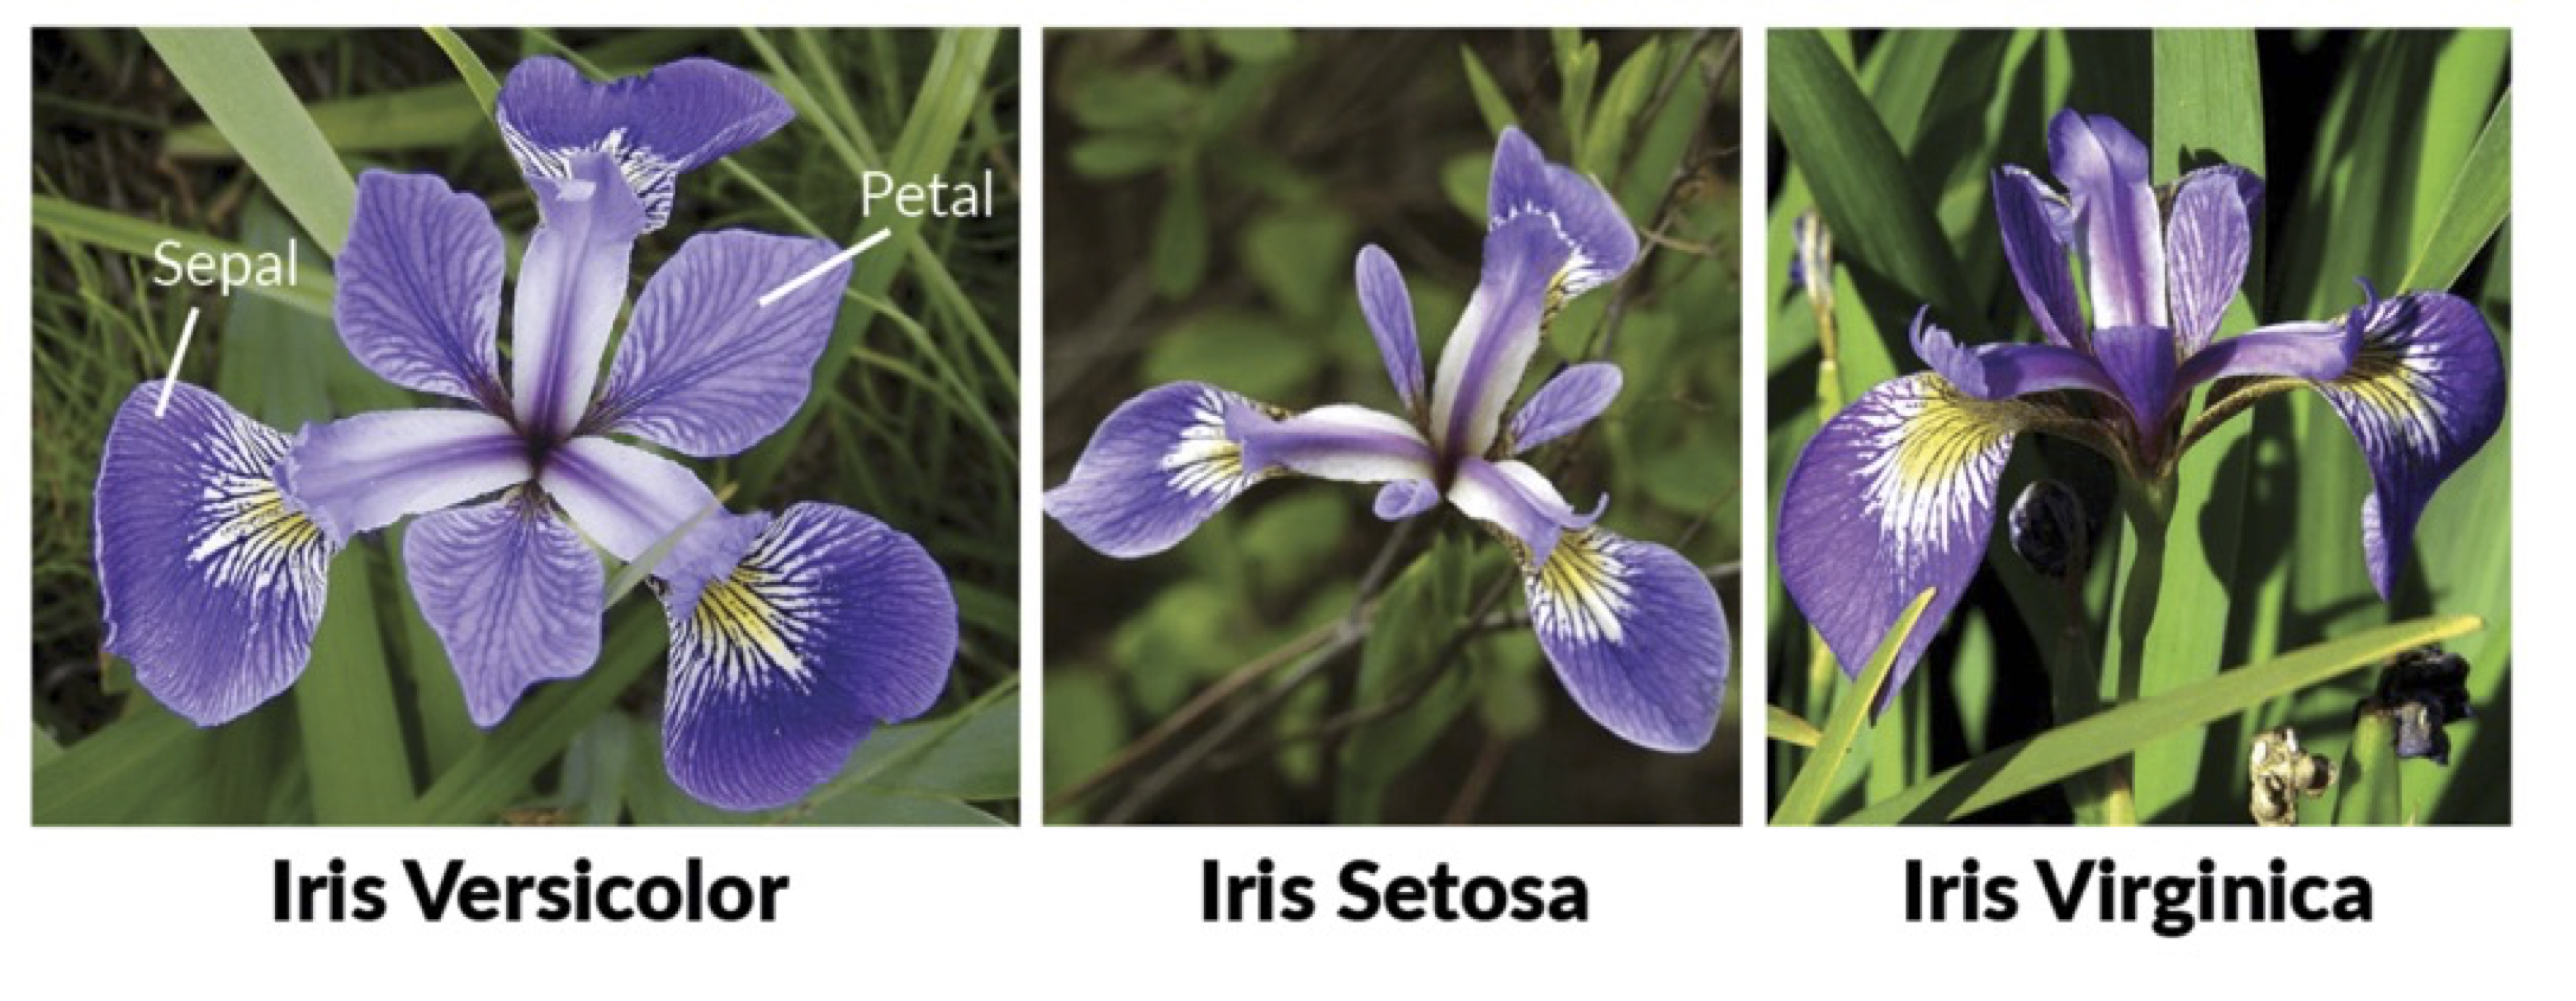

In [154]:
# Specify the location of the dataset
filename = 'iris.csv'
# Load the data into a Pandas DataFrame
df = pd.read_csv(filename)

In [155]:
# Look at the data frame
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1          5.100         3.500          1.400         0.200  Iris-setosa
1   2          4.900         3.000          1.400         0.200  Iris-setosa
2   3          4.700         3.200          1.300         0.200  Iris-setosa
3   4          4.600         3.100          1.500         0.200  Iris-setosa
4   5          5.000         3.600          1.400         0.200  Iris-setosa

## <font color=grey> WORKFLOW: Clean and Preprocess the Dataset  </font>

## STEP 3: Clean the data
- Find and Mark Missing Values 
- If there are no missing data points, then proceed to Step 4.


In [157]:
#Add your codes here
# mark zero values as missing or NaN
df[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' ,'PetalWidthCm' ]] \
= df[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm'
]].replace(0,np.NaN)

# count the number of NaN values in each column
print(df.isnull().sum())



Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## STEP 4: Performing the Exploratory Data Analysis (EDA) 
- Print a count of the number of rows (observations) and columns (variables)
- Print the data types of all variables
- Print a summary statistics of the data
- Print the number of records in each class

In [158]:
#Add your codes here

# Get the number of records/rows and the number of variables/columns
print("Shape of the dataset(rows, columns):",df.shape)



Shape of the dataset(rows, columns): (150, 6)


In [159]:
#get the data types of all the variables / attributes in the data set
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [160]:
#return the summary statistics of the numeric variables/attributes in the data set
print(df.describe())

           Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count 150.000        150.000       150.000        150.000       150.000
mean   75.500          5.843         3.054          3.759         1.199
std    43.445          0.828         0.434          1.764         0.763
min     1.000          4.300         2.000          1.000         0.100
25%    38.250          5.100         2.800          1.600         0.300
50%    75.500          5.800         3.000          4.350         1.300
75%   112.750          6.400         3.300          5.100         1.800
max   150.000          7.900         4.400          6.900         2.500


In [161]:
#Add your codes here

#class distribution i.e. how many records are in each class
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## STEP 4A: Create Histograms 
- Create histograms from the dataframe df that is black with a figure size of 14 x 12
- Plot the histograms


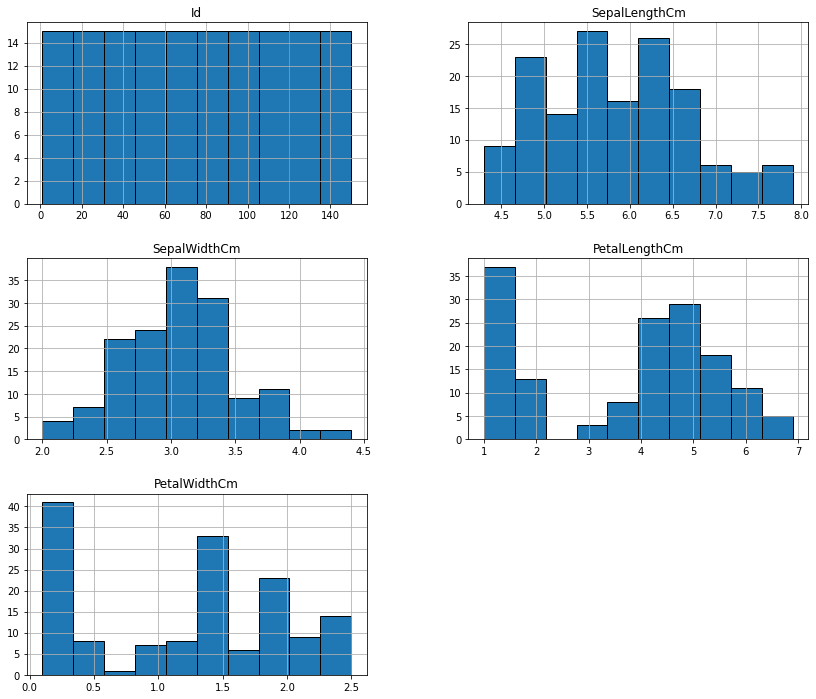

In [162]:
#Add your codes here

# Plot histogram for each variable.
df.hist(edgecolor= 'black',figsize=(14,12)) 
plt.show()


## Step 4B: Creating Boxplots 
- Create boxplots from the dataframe df with a layout (5,3) and figure size (20,18). Ensure subplots is True and sharex is False.
- Plot the boxplots


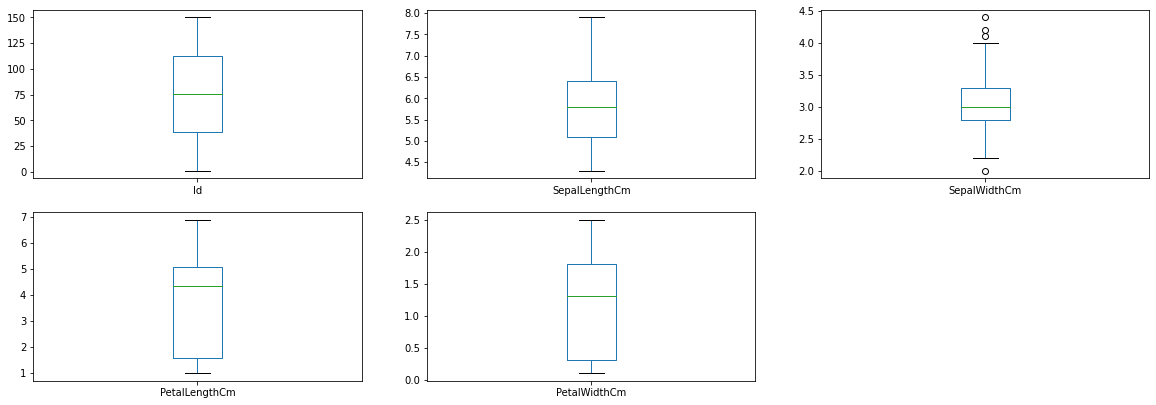

In [163]:
#Add your codes here

# Boxplots
df.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(20,18))
plt.show()



## Step 4C: Create Pair Plots 
- Create pair plots of the dataframe with a height of 3.5
- Plot the pair plots
- Add color

Note: Please click on the above URL to learn more about Pair Plots 

https://seaborn.pydata.org/generated/seaborn.pairplot.html


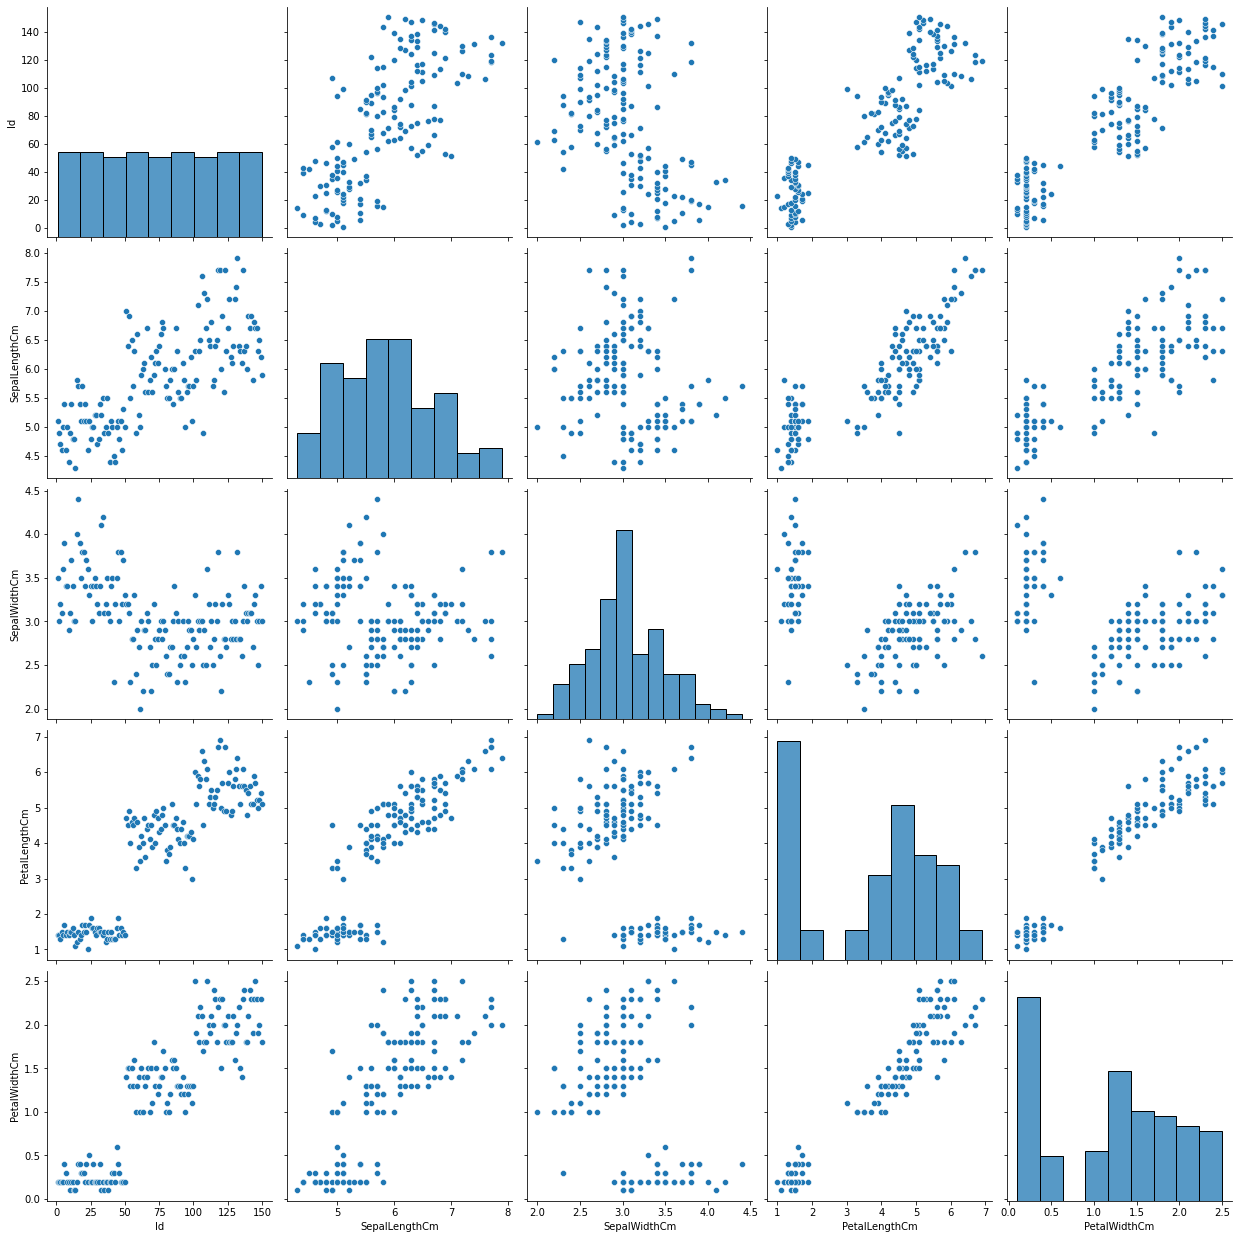

In [164]:
#Add your codes here

# Create pair plots
sns.pairplot(df, height=3.5); 
plt.show()



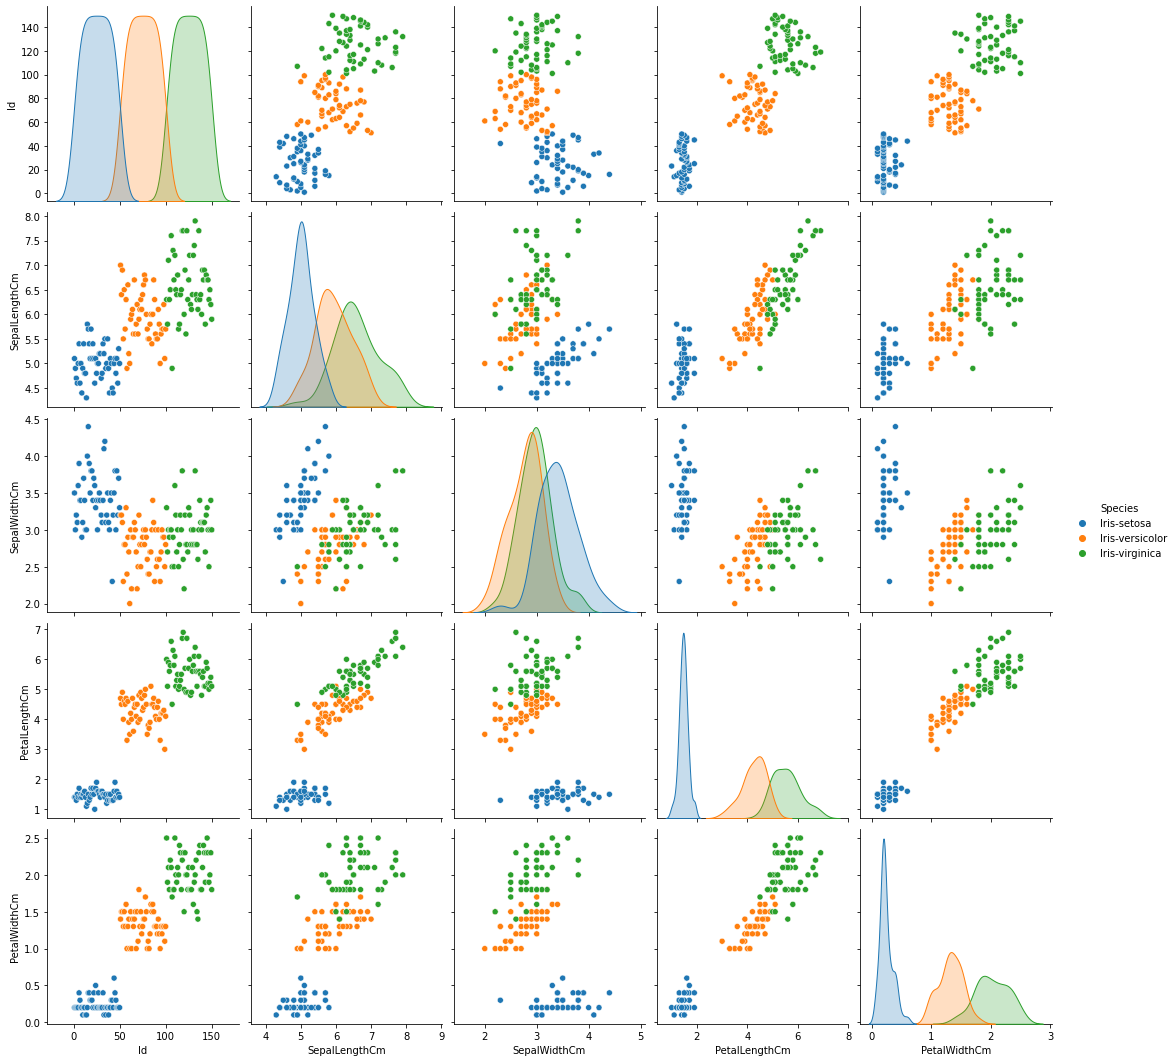

In [165]:
#Add your codes here

# Let's try that again using color. Notice: assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE)

sns.pairplot(df, hue='Species', height=3, aspect= 1);

## Step 4D: Creating Violin Plots 
- Create violin plots 
- Plot the violin plots
- Add color

Note: Please click on the above URL to learn more about Violin Plots 

https://seaborn.pydata.org/generated/seaborn.violinplot.html 


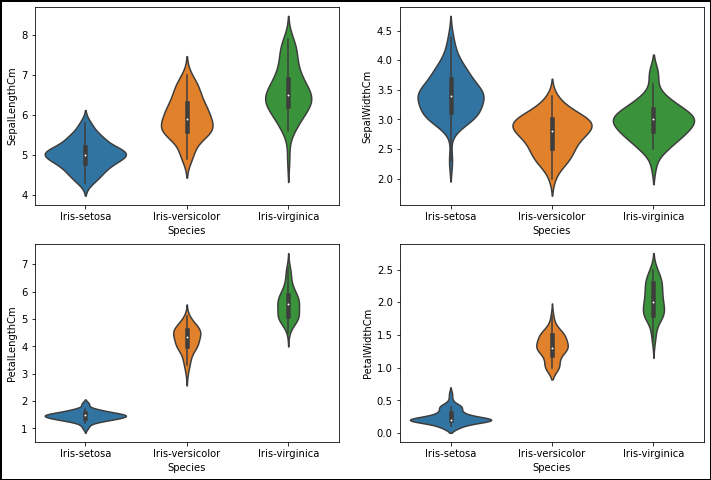

In [167]:
#Add your codes here
# Violin Plot
plt.figure(edgecolor="black", linewidth= 1.2,figsize=(12,8)); 
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=df) 
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=df) 
plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=df) 
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=df);

## <font color=grey> WORKFLOW: DATA SPLIT  </font>

## STEP 5: Separate the Dataset into Input & Output NumPy Arrays 
- Store the dataframe values into a NumPy array
- Separate the array into input and output components by slicing 

In [168]:
# store dataframe values into a numpy array
array = df.values
# separate array into input and output by slicing
# for X(input) [:, 1:5] --> all the rows, columns from 1 - 5
# these are the independent variables or predictors
X = array[:,1:5]
# for Y(input) [:, 5] --> all the rows, column 5
# this is the value we are trying to predict
Y = array[:,5]

## STEP 6: Split into Input/Output Array into Training/Testing Datasets 
- Split the dataset into training at 67% and test at 33% with the seed = 7


In [169]:
# split the dataset --> training sub-dataset: 67%; test sub-dataset: 33%
test_size = 0.33
#selection of records to include in each data sub-dataset must be done randomly
seed = 7

In [170]:
#Add your codes here
#split the dataset (input and output) into training / test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)


## <font color=grey> WORKFLOW: TRAIN MODEL  </font>

## STEP 7: Build and Train the Model 
- Assign LogisticRegression to the model
- Train the model 
- Print the classification report

In [171]:
#Add your codes here
#build the model
model = LogisticRegression(random_state=seed, max_iter=1000) 
# train the model using the training sub-dataset
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=7)

In [172]:
#Add your codes here
#print the classification report 
predicted = model.predict(X_test)

report = classification_report(Y_test, predicted) 

print("Classification Report: ", "\n", "\n",report)



Classification Report:  
 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.89      0.89        18
 Iris-virginica       0.89      0.89      0.89        18

       accuracy                           0.92        50
      macro avg       0.93      0.93      0.93        50
   weighted avg       0.92      0.92      0.92        50



## <font color=grey> WORKFLOW: SCORE MODEL 1  </font>

## STEP 8: Score the Accuracy of the Model 
- Calculate accuracy score 
- Print the score

In [173]:
#Add your codes here
#score the accuracy level
result = model.score(X_test, Y_test)
#print out the results
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 92.000%


## Step 9: Prediction 
- Execute model prediction

Note: We have now trained the model and using that trained model to predict the type of flower we have with the listed values for each variable. 

In [174]:
#Add your codes here

#predict with[5.3, 3.0, 4.5, 1.5]
model.predict([[5.3, 3.0, 4.5, 1.5]])



array(['Iris-versicolor'], dtype=object)

In [175]:
#Add your codes here
#predict with [5, 3.6, 1.4, 1.5]
model.predict([[5, 3.6, 1.4, 1.5]])


array(['Iris-setosa'], dtype=object)

## <font color=grey> WORKFLOW: EVALUATE MODELS  </font>

## Step 10: Train & Score Model 2 Using K-Fold Cross Validation Data Split
- Specify the k-size to 10
- Fix the random seed to 7
- Split the entire data set
- Obtain the accuracy level
- Train the model and run K-fold cross-validation
- Print results


In [177]:
#Add your codes here

# Evaluate the algorithm and specify the number of times of repeated splitting, in this case, 10 folds
n_splits=10
#Fix the random seed. You must use the same seed value so that the same subsets can be obtained for each time the process is repeated
seed=7

# Split the whole data set into folds
kfold=KFold(n_splits, random_state=seed, shuffle=True)

# for logistic regression, we can use the accuracy level to evaluate the model
scoring="accuracy"


In [178]:
#Add your codes here

#train the model and run K-fold cross-validation to validate / evaluate the model
results=cross_val_score (model, X, Y, cv=kfold, scoring=scoring)

# print the evaluation results. The result is the average of all the results obtained from the K-fold cross-validation
print("Accuracy: %.3f (%.3f)"% (results.mean(), results.std()))


Accuracy: 0.967 (0.054)


## GREAT JOB! YOU ARE DONE.